In [ ]:
!pip install sweetviz
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=aca2205a9d8a702f3aeba4be5ca44149632240b557fbdda15c076f56be3dbdf0
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Data Preprocessing and Cleaning**

In [ ]:
import pandas as pd

# Load the dataset
tweets_df = pd.read_csv('/content/gdrive/MyDrive/CMPE-255/Assignment 5/Data Set/Task-7/tweets.csv')

# Display the first few rows of the dataset
tweets_df.head()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN


In [ ]:
# Checking for missing values and data types
missing_data = tweets_df.isnull().sum()
data_types = tweets_df.dtypes

missing_data, data_types


(id                            0
 handle                        0
 text                          0
 is_retweet                    0
 original_author            5722
 time                          0
 in_reply_to_screen_name    6236
 in_reply_to_status_id      6242
 in_reply_to_user_id        6236
 is_quote_status               0
 lang                          0
 retweet_count                 0
 favorite_count                0
 longitude                  6432
 latitude                   6432
 place_id                   6240
 place_full_name            6240
 place_name                 6240
 place_type                 6240
 place_country_code         6240
 place_country              6240
 place_contained_within     6240
 place_attributes           6240
 place_bounding_box         6240
 source_url                    0
 truncated                     0
 entities                      0
 extended_entities          5096
 dtype: int64,
 id                           int64
 handle                  

**Auto Exploratory Data Analysis (EDA) using Sweetviz**

In [ ]:
# Import Sweetviz
import sweetviz as sv

# Generate the report
report = sv.analyze(tweets_df)

# Display the report
report.show_html('/content/gdrive/MyDrive/CMPE-255/Assignment 5/Data Set/Task-7/report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report /content/gdrive/MyDrive/CMPE-255/Assignment 5/Data Set/Task-7/report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Clustering and Anomaly Detection**

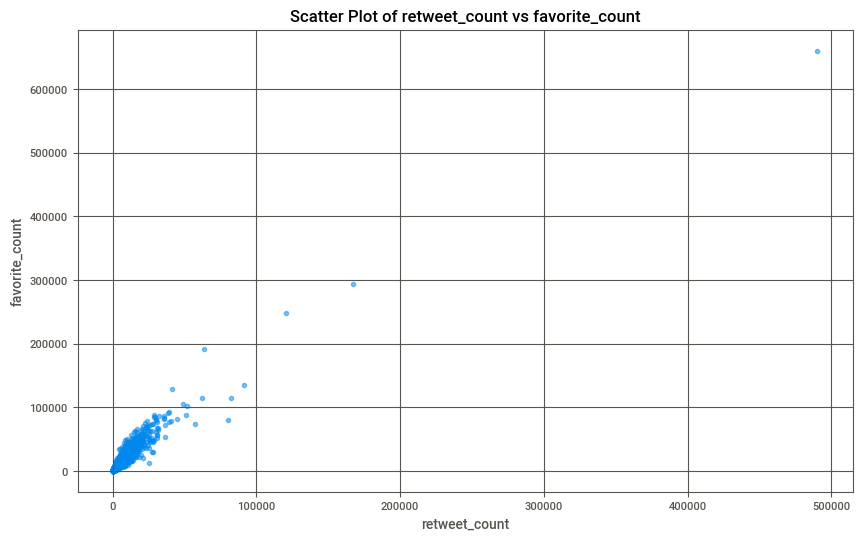

In [ ]:
import matplotlib.pyplot as plt

# Plotting the data points
plt.figure(figsize=(10, 6))
plt.scatter(tweets_df['retweet_count'], tweets_df['favorite_count'], alpha=0.5)
plt.title('Scatter Plot of retweet_count vs favorite_count')
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')
plt.grid(True)
plt.show()


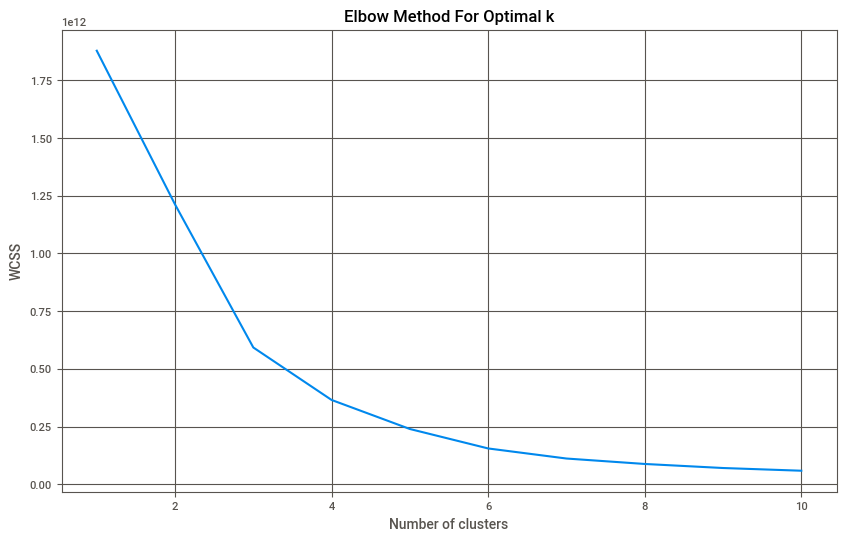

In [ ]:
from sklearn.cluster import KMeans

# Data for clustering
X = tweets_df[['retweet_count', 'favorite_count']]

# Using the Elbow method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


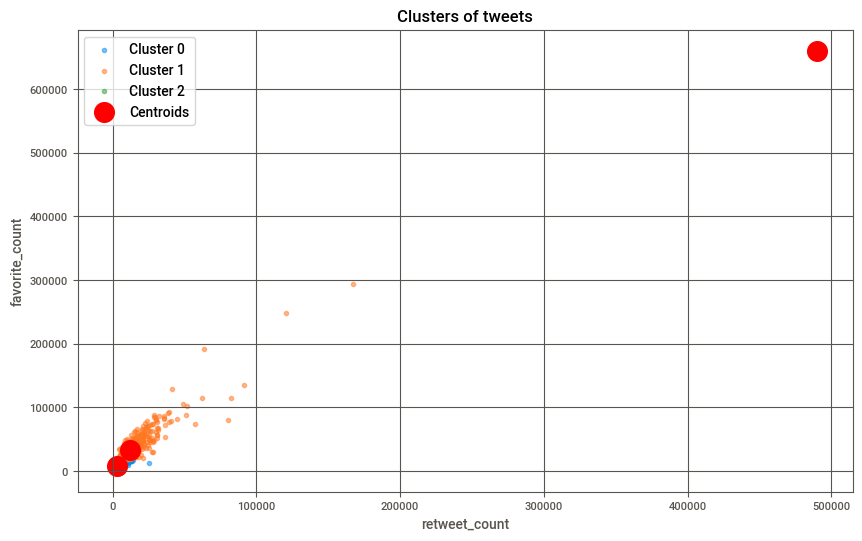

In [ ]:
# Assuming the optimal number of clusters is around 3 (based on typical Elbow Method outcomes)
# This can be adjusted based on the actual outcome from the Elbow Method graph.
optimal_clusters = 3

# Applying KMeans clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
tweets_df['cluster'] = kmeans.fit_predict(X)

# Plotting the clusters
plt.figure(figsize=(10, 6))
for i in range(optimal_clusters):
    plt.scatter(tweets_df[tweets_df['cluster'] == i]['retweet_count'],
                tweets_df[tweets_df['cluster'] == i]['favorite_count'],
                label=f'Cluster {i}', alpha=0.5)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('Clusters of tweets')
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Encoding the handle as a binary classification target: 1 for 'HillaryClinton', 0 for others
tweets_df['target'] = tweets_df['handle'].apply(lambda x: 1 if x == 'HillaryClinton' else 0)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tweets_df['text'], tweets_df['target'], test_size=0.2, random_state=42)

# Using TF-IDF to vectorize the tweets
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

X_train_vectorized.shape, X_test_vectorized.shape


((5155, 5000), (1289, 5000))

**Model Building with AutoML H20**

In [ ]:
# Importing necessary libraries for H2O
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O cluster
h2o.init()




Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,53 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_unknownUser_9rmlf7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.169 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:

# Convert the vectorized data to a DataFrame
X_train_df = pd.DataFrame(X_train_vectorized.toarray(), columns=vectorizer.get_feature_names_out(), index=X_train.index)
X_test_df = pd.DataFrame(X_test_vectorized.toarray(), columns=vectorizer.get_feature_names_out(), index=X_test.index)

# Add the target variable back to the DataFrame
train_df = pd.concat([X_train_df, y_train], axis=1)
test_df = pd.concat([X_test_df, y_test], axis=1)

train_df.shape, test_df.shape



#

((5155, 5001), (1289, 5001))

In [ ]:
# Convert the pandas DataFrame to H2OFrame
train_frame = h2o.H2OFrame(train_df)
test_frame = h2o.H2OFrame(test_df)

# Convert the response column to a factor (for classification)
train_frame["target"] = train_frame["target"].asfactor()
test_frame["target"] = test_frame["target"].asfactor()

# Specify the target and input columns
y = "target"
X = train_frame.columns
X.remove(y)

# Run AutoML
aml = H2OAutoML(max_runtime_secs=600, seed=1)
aml.train(x=X, y=y, training_frame=train_frame)

# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
10:17:48.153: _train param, Dropping bad and constant columns: [dayton, senatorfischer, 9ohimg204y, safer, 8lreiqhiun, childdefender, qfhfcqg0wa, qnizisgrg8, salary, ajazzyworld, megan, protected, s9rndkm0zl, wasted, rqmssbfb0j, 7nreqym7ff, pbft0eq3y1, mile, rwalkertennesse, ak, airport, a3ddtkjatg, pmnorlando, scandals, mucho, quitter, achieve, roxanetancredi, bombshell, quora, responsibility, sexism, quiet, rt8gmf6whl, sayhername, sexist, aaioyi1hfa, 73ucyv6ql4, pulled, column, breathe, pgiykhlgti, predictions, salud, rbffcq8gqq, slam, ct, 3hcnzj0slx, interventions, sandra, returning, scratched, 700, petition, igual, blames, bmzykqozjj, 7zicpdr1iv, nació, rone, pillars, dig, believing, qz3z10cqkn, pushes, recommendations, qfrs4beuc1, rxza7niodt, sewlwkn1sz, ajgnm05ts6, female, h